In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import geopandas
import shapely.geometry

In [2]:
# Load the data sets
mad_gcs = geopandas.read_file("City_Limit.zip")
water_gcs = geopandas.read_file("Lakes_and_Rivers.zip")
fire_gcs = geopandas.read_file("Fire_Stations.geojson")
water_gcs.explore()

<Axes: >

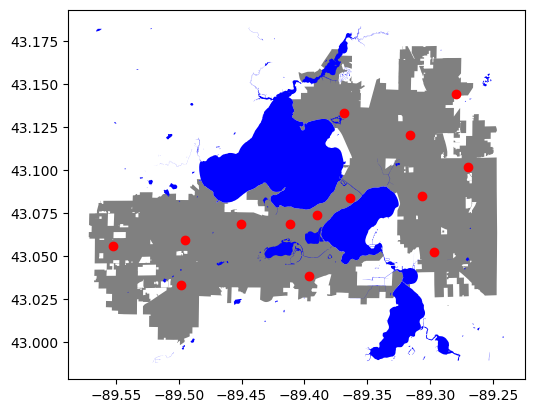

In [3]:
# Plot everything on the same map
ax = mad_gcs.plot(color = "gray")
water_gcs.plot(color = "blue", ax = ax)
fire_gcs.plot(color = "red", ax = ax)

In [4]:
# The area computed based on longitude and latitude is incorrect
water_gcs.area

C:\Users\young\AppData\Local\Temp\ipykernel_15160\3197407685.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  water_gcs.area


0      4.103137e-07
1      3.273822e-07
2      3.800587e-08
3      1.206193e-08
4      4.179873e-07
           ...     
184    4.464876e-08
185    3.119503e-08
186    6.128557e-07
187    2.134471e-07
188    5.106610e-07
Length: 189, dtype: float64

<Axes: >

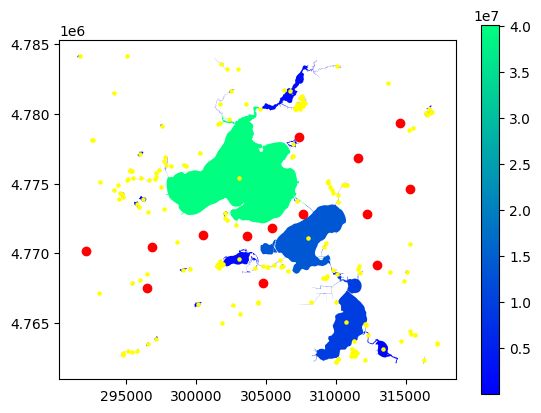

In [5]:
# Plot the lakes again based on the area
mad = mad_gcs.to_crs("epsg:32616")
water = water_gcs.to_crs(mad.crs)
fire = fire_gcs.to_crs(mad.crs)
ax = water.plot(water.area, cmap="winter", legend = True)
water.centroid.plot(color = "yellow", markersize = 5, ax = ax)
fire.plot(color = "red", ax = ax)

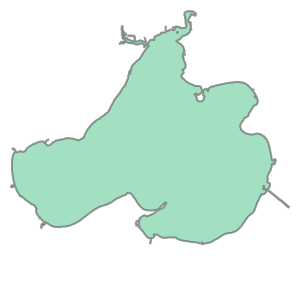

In [6]:
# Find the largest lake
area = water.area
largest = water.iloc[area.idxmax()].geometry
largest

<Axes: >

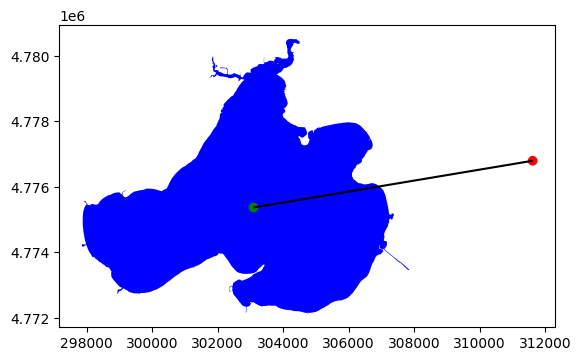

In [7]:
# Find the center of the lake and the closest fire station
center = water.centroid[area.idxmax()]
closest = fire.iloc[0].geometry
station = 0
distance = center.distance(closest)
for index, row in fire.iterrows():
    if center.distance(row.geometry) < distance:
        closest = row.geometry
        station = index
ax = geopandas.GeoSeries([largest, center, closest]).plot(color = ["blue", "green", "red"])
geopandas.GeoSeries(shapely.geometry.LineString([center, closest])).plot(color = "black", ax = ax)